# Example notebook for the ATOM pipeline
---------------------------------

Load the data with one of the three imported datasets before running the
ATOM function. These datasets are provided by sklearn and are very small
and easy to learn. You can learn more about these datasets
at https://scikit-learn.org/stable/datasets/index.html.

    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

In [1]:
# Import packages
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from atom import ATOMClassifier

# Load the dataset's fetatures and targets as arrays
X, Y = load_breast_cancer(return_X_y=True)

## Run ATOM pipeline

In [2]:
# Call ATOMclass for ML task exploration
atom = ATOMClassifier(X, Y, verbose=3)

# Fit the pipeline with the selected models
atom.fit(models=['LDA','RF', 'lSVM'],
         metric='accuracy',
         max_iter=7,
         init_points=1,
         cv=3,
         bagging=10)

<<=============== ATOM ===============>>
Initial data cleaning...
Algorithm task: binary classification.

Data stats =====================>
Number of features: 30
Number of instances: 569
Size of training set: 398
Size of test set: 171
Instances per target class:
target --> Count
0      --> 212
1      --> 357


Running pipeline =================>
Models in pipeline: LDA, RF, lSVM


Running BO for Linear Discriminant Analysis...
Parameters --> {'solver': 'svd', 'n_components': 200, 'tol': 0.001}
Evaluation --> Accuracy: 0.9498
Parameters --> {'solver': 'svd', 'n_components': 200, 'tol': 0.0397}
Evaluation --> Accuracy: 0.9497
num acquisition: 1, time elapsed: 0.25s
Parameters --> {'solver': 'lsqr', 'n_components': 1, 'tol': 0.0818, 'shrinkage': 0.7000000000000001}
Evaluation --> Accuracy: 0.8819
num acquisition: 2, time elapsed: 0.62s
Parameters --> {'solver': 'eigen', 'n_components': 250, 'tol': 0.0403, 'shrinkage': 0.1}
Evaluation --> Accuracy: 0.8819
num acquisition: 3, time elapsed:

## Analyze results

In [3]:
atom.results

,model,Accuracy,time,bagging_mean,bagging_std,bagging_time
0,LDA,0.976608,2.48s,0.972515,0.009078,0.06s
1,RF,0.959064,4.29s,0.952047,0.013539,1.79s
2,lSVM,0.982456,2.17s,0.970175,0.004858,0.03s


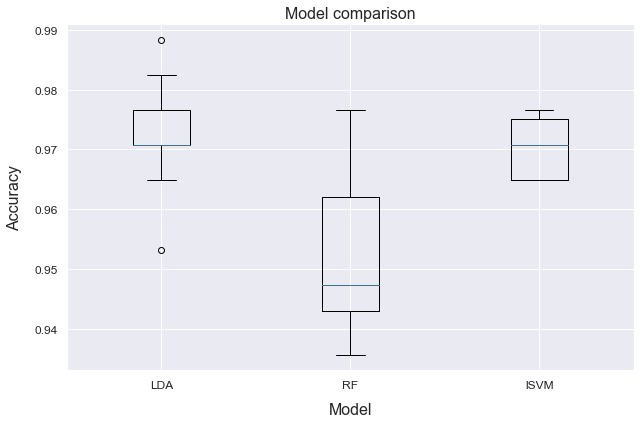

In [4]:
atom.boxplot()

### Let's have a deeper look into the support vector machine

In [5]:
# Get the results on some other metrics
print('SVM precision on test set: ', atom.lsvm.Precision())
print('SVM F1 on test set: ', atom.lsvm.F1())

SVM precision on test set:  0.9821428571428571
SVM F1 on test set:  0.9865470852017937


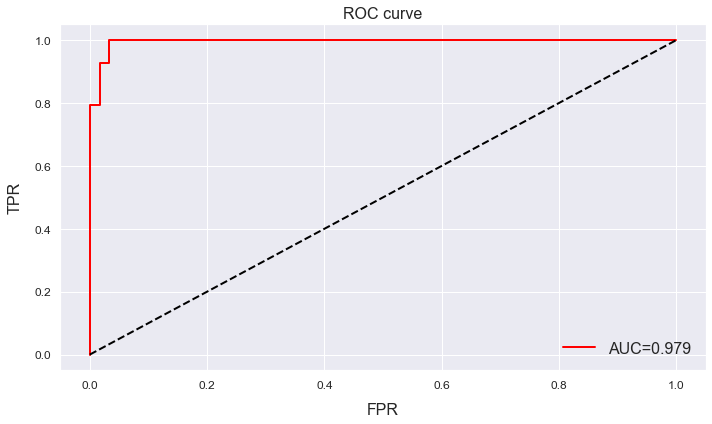

In [6]:
# Show the ROC plot
atom.lsvm.plot_ROC()

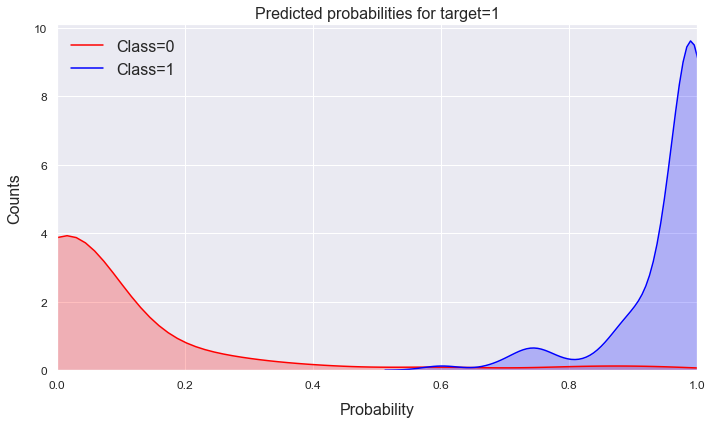

In [7]:
# Plot the probability distribution of having breast cancer
atom.lsvm.plot_probabilities()

### And what about the random forest?

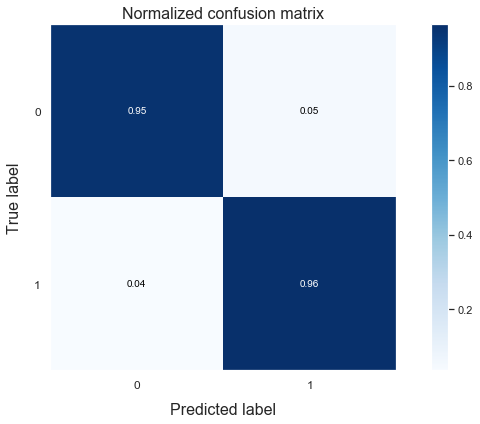

In [8]:
# Plot the final confusion matrix
atom.rf.plot_confusion_matrix(filename='svm_confusion_matrix')

In [9]:
# Save the model for production
atom.rf.save('SVM_final')

File saved successfully!
